<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Кумулятивная-выручка" data-toc-modified-id="Кумулятивная-выручка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кумулятивная выручка</a></span></li><li><span><a href="#Кумулятивный-средний-чек" data-toc-modified-id="Кумулятивный-средний-чек-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кумулятивный средний чек</a></span></li><li><span><a href="#Кумулятивная-конверсия" data-toc-modified-id="Кумулятивная-конверсия-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кумулятивная конверсия</a></span></li><li><span><a href="#Количество-заказов-на-пользователя" data-toc-modified-id="Количество-заказов-на-пользователя-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Количество заказов на пользователя</a></span></li><li><span><a href="#Стоимость-заказов" data-toc-modified-id="Стоимость-заказов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Стоимость заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-между-группами" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-между-группами-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии между группами</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии между группами по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Приоритизация гипотез и анализ результатов A/B-теста

Целью данного исследования является анализ результатов A/B-теста для принятия решения о необходимости внедрения изменений на странице оформления заказа крупного интернет-магазина. 

Также совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки, необходимо приоритизировать гипотезы.

# Приоритизация гипотез

## Загрузка и предобработка данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузим файл с данными о гипотезах и сохраним его в переменную `df`. Выведем на экран первые 5 строк датафрейма:

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')
display(df.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Согласно документации к данным:

- `Hypothesis` — краткое описание гипотезы
- `Reach` — охват пользователей по 10-балльной шкале
- `Impact` — влияние на пользователей по 10-балльной шкале
- `Confidence` — уверенность в гипотезе по 10-балльной шкале
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале

Приведем названия столбцов в к нижнему регистру:

In [3]:
df.columns = df.columns.str.lower()

Применим фреймворк ICE для приоритизации гипотез:

In [4]:
df['ice'] = (df['impact'] * df['confidence']) / df['efforts']

display(df[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее приоритетными по фреймворку ICE являются гипотезы 8, 0, 7, 6 и 2.

Применим фреймворк RICE для приоритизации гипотез:

In [5]:
df['rice'] = (df['reach'] * df['impact'] * df['confidence']) / df['efforts']

display(df[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее приоритетными по фреймворку RICE являются гипотезы 7, 2, 0, 6 и 8.

При использовании разных фреймворков перечень приоритетных гипотез не поменялся, но изменился порядок их приоритета. Это произошло по причине того, что фреймворк RICE учитывает также охват пользователей, которых затронет изменение.

# Анализ A/B-теста

## Загрузка и предобработка данных

Загрузим файлы с данными о результатах A/B-теста и сохраним их в переменные `orders` и `visitors`. Выведем на экран первые 5 строк датафреймов:

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Согласно документации к данным:

Таблица **`orders`** (информация о заказах):
- `transactionId` — идентификатор заказа
- `visitorId` — идентификатор пользователя, совершившего заказ
- `date` — дата, когда был совершён заказ
- `revenue` — выручка заказа
- `group` — группа A/B-теста, в которую попал заказ

Таблица **`visitors`** (информация о посетителях):
- `date` — дата
- `group` — группа A/B-теста
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Переименуем столбцы в датафрейме `orders`:

In [7]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

Изучим общую информацию о таблицах:

In [8]:
tables = [orders, visitors]
tables_name = ['orders', 'visitors']

for i in tables:
    i.info()
    print('\n' * 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB





Пропуски в таблицах отсутствуют. Заменим тип данных в столбцах с датой с текстового на `datetime`:

In [9]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим наличие явных дубликатов в таблицах:

In [10]:
j=-1

for i in tables:
    j +=1
    print('Количество дубликатов в', tables_name[j],':', i.duplicated().sum())

Количество дубликатов в orders : 0
Количество дубликатов в visitors : 0


Явные дубликаты в таблицах не обнаружены.

## Кумулятивная выручка

Соберём агрегированные кумулятивные по дням данные о заказах:

In [11]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date':'max', 
                            'group':'max', 
                            'transaction_id':'nunique', 
                            'visitor_id':'nunique',
                            'revenue':'sum'}), axis=1).sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date':'max',
                            'group':'max',
                            'visitors':'sum'}), axis=1).sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head()) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

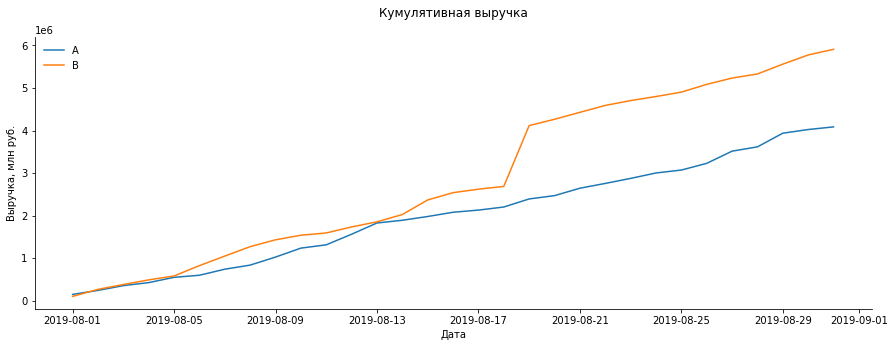

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

# построим график
plt.figure(figsize=(15, 5))
sns.lineplot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
sns.lineplot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивная выручка', pad=20) 
plt.xlabel('Дата')
plt.ylabel('Выручка, млн руб.')
plt.legend(frameon=False, loc=2)
sns.despine()
plt.show()

На графике виден резкий рост выручки в группе **B**, который произошел на третьей неделе теста. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Проанализируем более детально динамику среднего чека в группах.

## Кумулятивный средний чек

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

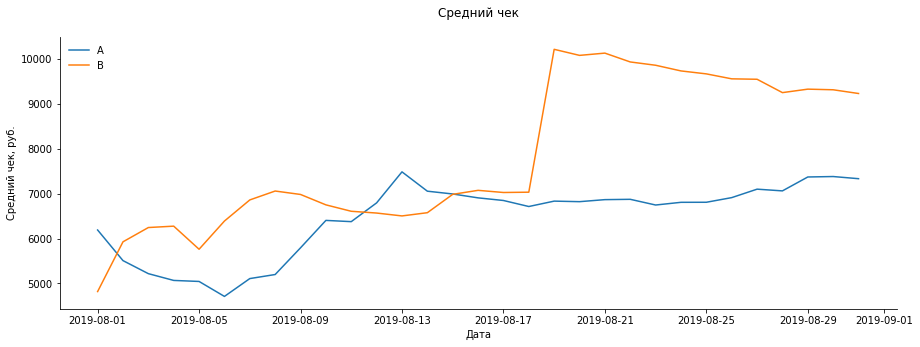

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Средний чек', pad=20) 
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.legend(frameon=False, loc=2)
sns.despine()
plt.show()

Средний чек в группе **B** резко растет, следовательно, в группу попали крупные заказы.

Построим график относительного различия для среднего чека:

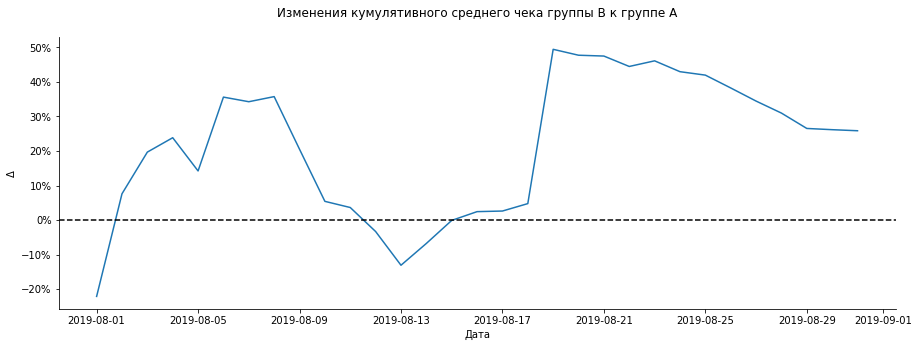

In [14]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, on='date', how='left', suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
ax = sns.lineplot(merged_cumulative_revenue['date'], 
                  ((merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
                  (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)*100)

plt.axhline(y=0, color='black', linestyle='--')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))  
plt.title('Изменения кумулятивного среднего чека группы B к группе A', pad=20) 
plt.xlabel('Дата')
plt.ylabel('Δ')
sns.despine()
plt.show()

В нескольких точках график различия среднего чека резко «скачет».

## Кумулятивная конверсия

Аналогично проанализируем график кумулятивной конверсии:

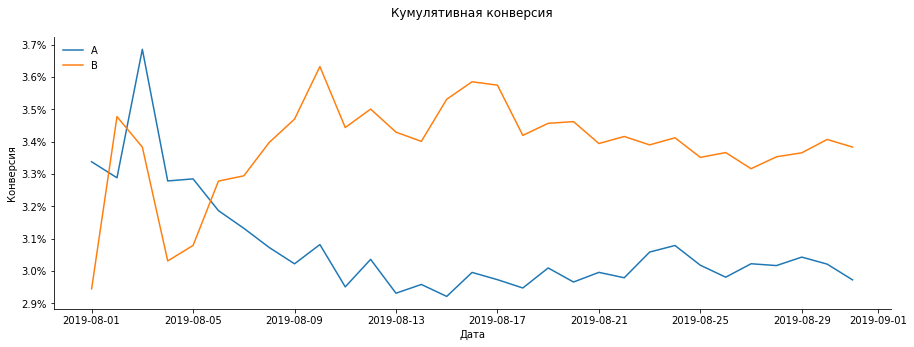

In [15]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# строим графики
plt.figure(figsize=(15, 5))
ax = sns.lineplot(cumulative_data_a['date'], cumulative_data_a['conversion']*100, label='A')
ax = sns.lineplot(cumulative_data_b['date'], cumulative_data_b['conversion']*100, label='B')
plt.title('Кумулятивная конверсия', pad=20) 
plt.xlabel('Дата')
plt.ylabel('Конверсия')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))  
plt.legend(frameon=False, loc=2)
sns.despine()
plt.show()

В начале теста конверсия в группе **B** была ниже, чем в группе **A**, но затем она выросла и стабилизировалась на более высоком уровне.

Построим график относительного различия кумулятивных конверсий:

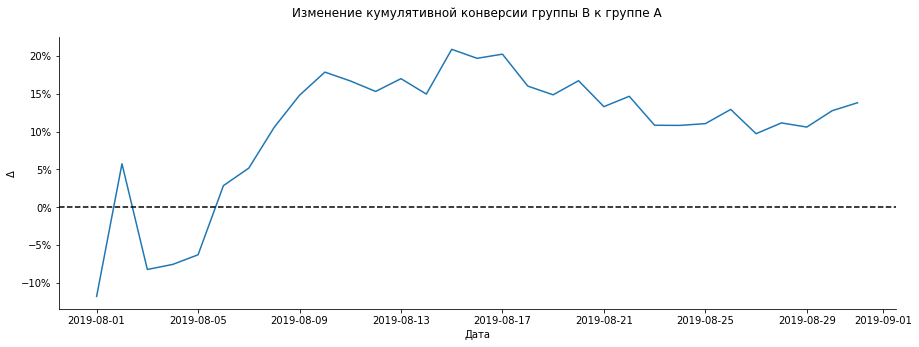

In [16]:
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                   on='date', how='left', suffixes=['_a', '_b'])
)

plt.figure(figsize=(15, 5))
ax = sns.lineplot(merged_cumulative_conversions['date'], (merged_cumulative_conversions['conversion_b']/
             merged_cumulative_conversions['conversion_a']-1)*100)

plt.title('Изменение кумулятивной конверсии группы B к группе A', pad=20) 
plt.axhline(y=0, color='black', linestyle='--')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0)) 
plt.xlabel('Дата')
plt.ylabel('Δ')
sns.despine()
plt.show()

После стабилизации конверсия в группе **B** в среднем выше на 10%, чем в группе **A**.

## Количество заказов на пользователя

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [17]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Это значительно больше, чем совершает обычный пользователь за неделю.
Построим гистрограмму распределения количества заказов на одного пользователя:

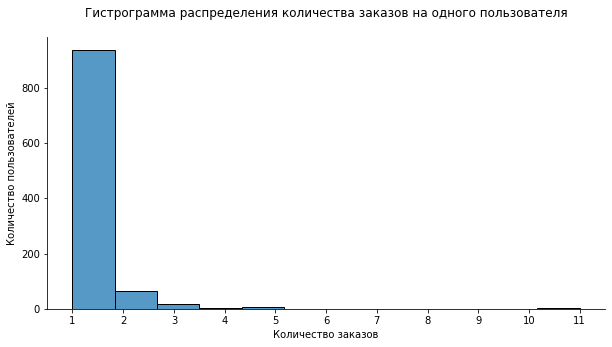

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(orders_by_users['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя', pad=20) 
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.xticks(np.arange(1, 12, 1))
sns.despine()
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя:

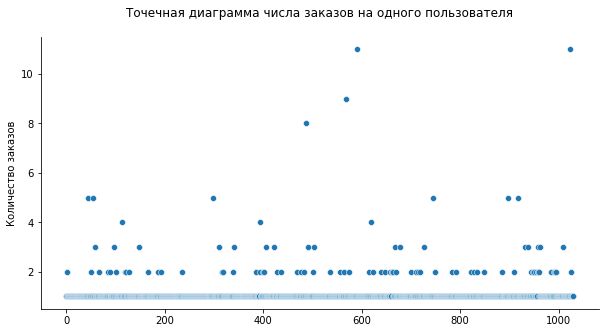

In [19]:
plt.figure(figsize=(10, 5))

x_values = pd.Series(range(0,len(orders_by_users)))
sns.scatterplot(x_values, orders_by_users['orders']) 

plt.title('Точечная диаграмма числа заказов на одного пользователя', pad=20) 
plt.ylabel('Количество заказов')
sns.despine()
plt.show()

Выводы подтверждаются: много пользователей с 2-4 заказами.

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [20]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа, 1% пользователей заказывали более 4-х раз.

## Стоимость заказов

Построим гистрограмму распределения стоимости заказа:

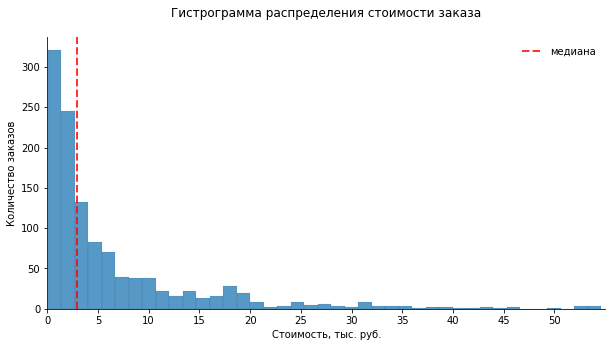

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(orders['revenue']/1000)
plt.axvline(x=(orders['revenue']/1000).median(), linewidth=2, color='r', linestyle='--', label='медиана', alpha=0.8)
plt.title('Гистрограмма распределения стоимости заказа', pad=20) 
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Количество заказов')
ax.set_xlim([0, 55])
plt.xticks(np.arange(0, 55, 5))
plt.legend(frameon=False)
sns.despine()
plt.show()

Основная часть заказов приходится на диапазон до 20 000 руб. Построим точечную диаграмму стоимости заказа:

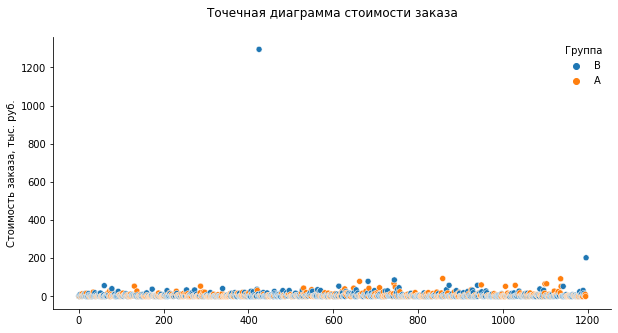

In [22]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
sns.scatterplot(x_values, orders['revenue']/1000, hue=orders['group']) 
plt.title('Точечная диаграмма стоимости заказа', pad=20) 
plt.ylabel('Стоимость заказа, тыс. руб.')
plt.legend(frameon=False, title='Группа', loc=1)
sns.despine()
plt.show()

В группе **B** есть несколько очень дорогих заказов которые и повлияли на рост среднего чека. 

Посчитаем 95-й и 99-й перцентили стоимости заказа:

In [23]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформляли заказ на сумму свыше 28 000 руб., 1% пользователей оформляли заказ на сумму свыше 58 000 руб.

## Статистическая значимость различий в конверсии между группами

Для оценки статистической значимости различия в конверсии между группами проверим гипотезу о равенстве долей.
Сформулируем нулевую гипотезу $H_{0}$: различие в конверсии между группами отсутствует. Тогда альтернативная гипотеза $H_{1}$ будет звучать как: есть различие в конверсии между группами. Зададим уровень статистической значимости α, равный 0.05. Для проверки гипотезы о равенстве долей применим z-тест для разности конверсий в группах:

In [24]:
# критический уровень статистической значимости
alpha = 0.05 

# создадим датафрейм с конверсиями по группам
conversion = cumulative_data[cumulative_data['date'] == 
                             cumulative_data['date'].max()][['group', 'orders', 'visitors', 'conversion']]

# конверсия в группе A
conversion_a = conversion[conversion['group'] == 'A']['conversion'].values[0]

# конверсия в группе B
conversion_b = conversion[conversion['group'] == 'B']['conversion'].values[0]

# посетители в группе A
visitors_a = conversion[conversion['group'] == 'A']['visitors'].values[0]

# посетители в группе B
visitors_b = conversion[conversion['group'] == 'B']['visitors'].values[0]

# конверсия в комбинированной группе
conversion_combined = conversion['orders'].sum() / conversion['visitors'].sum()

# разница конверсий в группах
difference = conversion_a - conversion_b

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(conversion_combined * (1 - conversion_combined) * (1 / visitors_a + 1 / visitors_b))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

# считаем относительную разницу
print('Относительные различия в конверсии между группами:', '{0:.3f}'.format(conversion_b / conversion_a - 1))

# считаем p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', '{0:.3f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными') 

Относительные различия в конверсии между группами: 0.138
p-value: 0.023
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


Проверка гипотезы показала, что различие в конверсии между группами статистически значимо, конверсия в группе **B** выше на 14%.

## Статистическая значимость различий в среднем чеке заказа между группами

Проверим статистическую значимость различий в среднем чеке между группами.
Аналогично сформулируем нулевую гипотезу $H_{0}$: различие в среднем чеке между группами отсутствует. Тогда альтернативная гипотеза $H_{1}$ будет звучать как: есть различие в среднем чеке между группами. Так как показатель средего чека имеет большой разброс, для проверки гипотезы о равенстве средних двух генеральных совокупностей применим непараметрический U-критерий Манна - Уитни:

In [25]:
# считаем p-value
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

# считаем относительную разницу
print('Относительные различия в среднем чеке между группами:', '{0:.3f}'.
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

print('p-value:', '{0:.3f}'.format(p_value))

# проводим проверку статистической значимости
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средним чеком есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными') 

Относительные различия в среднем чеке между группами: 0.259
p-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


Полученный p-value больше заданного уровня значимости, а значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек в группе **B** выше, чем в группе **A** на 26%.

## Статистическая значимость различий в конверсии между группами по «очищенным» данным

Оценим статистическую значимость различий в конверсии предварительно исключив из анализа аномальных пользователей.

Убедимся, что в наборе данных нет пользователей, которые участвовали в двух группах одновременно:

In [26]:
users_a = orders[orders['group'] == 'A']['visitor_id'].unique()
users_b = orders[orders['group'] == 'B']['visitor_id'].unique()

users_intersection = pd.Series(list(set(users_a).intersection(users_b)))

print(len(users_intersection))

58


Обнаружено 58 пользователей, которые попали в контрольную и тестовую группу одновременно, что является ошибкой. Для целей оценки статистической значимости различий в конверсии между группами по «очищенным» данным исключим данных пользователей из анализа.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и наиболее дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 28 000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`.
Узнаем, сколько всего аномальных пользователей методом shape():

In [27]:
# создаем список с количеством заказов для каждого из пользователей
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_users_b.columns = ['visitor_id', 'orders']

# создаем список пользователей с числом заказов больше 2
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'], 
                                 orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id']], axis=0)

# создаем список пользователей, совершивших заказы дороже 28 000
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

# объединим списки
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders, users_intersection], 
                           axis=0).drop_duplicates().sort_values()

print(abnormal_users.shape[0])

113


Всего обнаружено 113 аномальных пользователей.
Узнаем, как их действия повлияли на результаты тестов. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:

In [28]:
# количество визитов, совершенных аномальными пользователями
abnormal_users_a_visits = (
    orders[(orders['visitor_id'].isin(abnormal_users)) & (orders['group'] == 'A')]['visitor_id'].count()
)

abnormal_users_b_visits = (
    orders[(orders['visitor_id'].isin(abnormal_users)) & (orders['group'] == 'B')]['visitor_id'].count()
)

# заказы в группе A
orders_a_filtered = orders[(orders['group'] == 'A') & ~(orders['visitor_id'].isin(abnormal_users))]['transaction_id'].nunique()

# заказы в группе B
orders_b_filtered = orders[(orders['group'] == 'B') & ~(orders['visitor_id'].isin(abnormal_users))]['transaction_id'].nunique()

# посетители в группе A
visitors_a_filtered = visitors_a - abnormal_users_a_visits

# посетители в группе B
visitors_b_filtered = visitors_b - abnormal_users_b_visits

# конверсия в группе A
conversion_a_filtered = orders_a_filtered / visitors_a_filtered

# конверсия в группе B
conversion_b_filtered = orders_b_filtered / visitors_b_filtered

# конверсия в комбинированной группе
conversion_combined_filtered = (orders_a_filtered + orders_b_filtered) / (visitors_a_filtered + visitors_b_filtered)

# разница конверсий в группах
difference = conversion_a_filtered - conversion_b_filtered

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(conversion_combined_filtered * (1 - conversion_combined_filtered) * 
                                (1 / visitors_a_filtered + 1 / visitors_b_filtered))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

# считаем относительную разницу
print('Относительные различия в конверсии между группами:', '{0:.3f}'.format(conversion_b_filtered / conversion_a_filtered - 1))

# считаем p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', '{0:.3f}'.format(p_value))

# проводим проверку статистической значимости
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными') 

Относительные различия в конверсии между группами: 0.188
p-value: 0.007
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


Значение p-value снизилось, общие выводы по результатам теста не изменились — между конверсиями в группах есть статистически значимая разница, конверсия в группе **B** выше на 19%.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [29]:
# считаем относительную разницу
print(
    'Относительные различия в среднем чеке между группами:', '{0:.3f}'.format(
    orders[np.logical_and(orders['group'] == 'B', 
    np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/ 
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() 
    - 1)
)

# считаем p-value
p_value = (
    st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'], 
                    orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]
)

print('p-value:', '{0:.3f}'.format(p_value))

# проводим проверку статистической значимости
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средним чеком есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными')

Относительные различия в среднем чеке между группами: -0.022
p-value: 0.762
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


Значение p-value увеличилось, выводы по результатам теста не изменились, нет оснований считать средние чеки разными. Средний чек в группе **B** по «очищенным» данным ниже, чем в группе **A** на 2%.

## Общий вывод

В рамках данного исследования мы проанализировали результаты проведенного A/B теста и было установлено, что: 

- Большинство покупателей заказывали только один раз. Не более 5% пользователей оформляли больше чем 2 заказа, 1% пользователей заказывали более 4-х раз.
- Основная часть заказов приходится на диапазон до 20 000 руб. Не более 5% пользователей оформляли заказ на сумму свыше 28 000 руб., 1% пользователей оформляли заказ на сумму свыше 58 000 руб.

- На третьей неделе теста произошел резкий рост выручки в группе **B**, который был связан с появлением нескольких дорогих заказов. 
- В начале теста конверсия в группе **B** была ниже, чем в группе **A**, но затем она выросла и стабилизировалась на более высоком уровне.
- Проверка гипотезы показала, что различие в конверсии между группами статистически значимо, конверсия в группе **B** выше на 14%. 
- Оценка статистической значимости по «очищенным» от выбросов данным показала аналогичный результат — между конверсиями в группах есть статистически значимая разница, конверсия в группе **B** выше на 19%.
- Средний чек в группе **B** выше, чем в группе **A** на 26%. Для проверки гипотезы о равенстве средних двух генеральных совокупностей был применен непараметрический U-критерий Манна - Уитни, различие в среднем чеке заказа между группами не было обнаружено.
- Оценка по «очищенным» данным показала аналогичный результат — различия в среднем чеке заказа между группами нет, средний чек в группе **B** ниже, чем в группе **A** на 2%.

 На основании проведенного анализа рекомендуется остановить тест, зафиксировать победу группы **B** и масштабировать изменения на всех пользователей, параллельно отслеживая целевую метрику.